In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from pylab import rcParams

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Here I am isolating the columns names to strip the whitespace and replace them with '_'and make them all lower case so its consistent and easier to recall
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('  ','_').str.replace('__','_')
# sanity check on columns 
#sanity check
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Variable with discrepencies

1. min- adult mortality of 1?
2. 0 infant deaths?
3. 1.68 gdp?
4. population of 34?
5. BMI of 1
6. under five deaths of 0


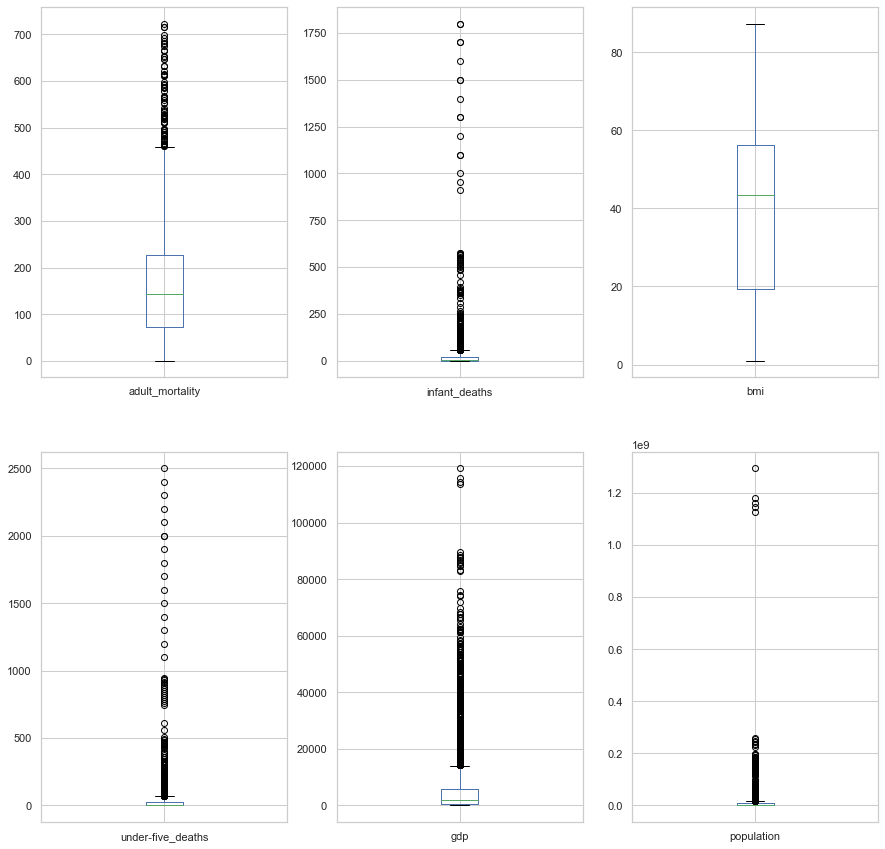

In [6]:
plt.figure(figsize=(15,15))
for i, col in enumerate(['adult_mortality','infant_deaths',
             'bmi','under-five_deaths','gdp',
             'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

### Treat null values 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2928 non-null float64
adult_mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2385 non-null float64
measles                            2938 non-null int64
bmi                                2904 non-null float64
under-five_deaths                  2938 non-null int64
polio                              2919 non-null float64
total_expenditure                  2712 non-null float64
diphtheria                         2919 non-null float64
hiv/aids                           2938 non-null

In [8]:
#percentage of null values in each column 
df.isnull().sum()*100/df.isnull().count()

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness_1-19_years                 1.157250
thinness_5-9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

In [9]:
# look at catagorical and numerical variable of my dataset
df.nunique()

country                             193
year                                 16
status                                2
life_expectancy                     362
adult_mortality                     425
infant_deaths                       209
alcohol                            1076
percentage_expenditure             2328
hepatitis_b                          87
measles                             958
bmi                                 608
under-five_deaths                   252
polio                                73
total_expenditure                   818
diphtheria                           81
hiv/aids                            200
gdp                                2490
population                         2278
thinness_1-19_years                 200
thinness_5-9_years                  207
income_composition_of_resources     625
schooling                           173
dtype: int64

In [10]:
df_1 = df.copy()
country_list = df_1.country.unique()
fill_list = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'under-five_deaths','bmi', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

In [11]:
for country in country_list:
    for col in fill_list:
        df_1.loc[:, col] = df_1.loc[:, col].interpolate()

In [12]:
## check if I still have nulls 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2938 non-null float64
adult_mortality                    2938 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2938 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2938 non-null float64
measles                            2938 non-null int64
bmi                                2938 non-null float64
under-five_deaths                  2938 non-null int64
polio                              2938 non-null float64
total_expenditure                  2938 non-null float64
diphtheria                         2938 non-null float64
hiv/aids                           2938 non-null

In [13]:
## fill the null values with mean of that year
years = df["year"].unique()
for year in years:
    for col in fill_list:
        df.loc[df["year"] == year, col] = df.loc[df["year"] == year, col].fillna(
            df[df["year"] == year][col].mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2938 non-null float64
adult_mortality                    2938 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2938 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2938 non-null float64
measles                            2938 non-null int64
bmi                                2938 non-null float64
under-five_deaths                  2938 non-null int64
polio                              2938 non-null float64
total_expenditure                  2938 non-null float64
diphtheria                         2938 non-null float64
hiv/aids                           2938 non-null

In [15]:
# CHeck for diference between the ways Nulls were treated
for col in fill_list:
     print(pd.concat([df_1[col], df[col]],axis = 1).describe())

       life_expectancy  life_expectancy
count      2938.000000      2938.000000
mean         69.214874        69.231777
std           9.510819         9.508362
min          36.300000        36.300000
25%          63.100000        63.200000
50%          72.000000        72.000000
75%          75.600000        75.600000
max          89.000000        89.000000
       adult_mortality  adult_mortality
count      2938.000000      2938.000000
mean        164.744554       164.741882
std         124.226596       124.083816
min           1.000000         1.000000
25%          74.000000        74.000000
50%         144.000000       144.000000
75%         228.000000       227.000000
max         723.000000       723.000000
       infant_deaths  infant_deaths
count    2938.000000    2938.000000
mean       30.303948      30.303948
std       117.926501     117.926501
min         0.000000       0.000000
25%         0.000000       0.000000
50%         3.000000       3.000000
75%        22.000000      22

There isn't much difference between the two ways null values were treated. 

### Treating Outliers

In [16]:
def outlier_count(col, data=df_1):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [17]:
cols = list(df.columns)[3:]
for col in cols:
    outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 12
Percent of data that is outlier: 0.41%
---------------adult_mortality---------------
Number of outliers: 82
Percent of data that is outlier: 2.79%
---------------infant_deaths---------------
Number of outliers: 315
Percent of data that is outlier: 10.72%
---------------alcohol---------------
Number of outliers: 1
Percent of data that is outlier: 0.03%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 248
Percent of data that is outlier: 8.44%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------bmi---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under-five_deaths---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------polio---------------
Number of o

In [18]:
def winsor(col, l_l=0, u_l=0.01):
    winsorized = winsorize(df[col],limits = (l_l, u_l))
    wins_dict[col] = winsorized
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.boxplot(df[col])
    plt.title('original {}'.format(col))
    plt.subplot(122)
    plt.boxplot(winsorized)
    plt.title('winsorized''{}'.format(col))
    plt.show()

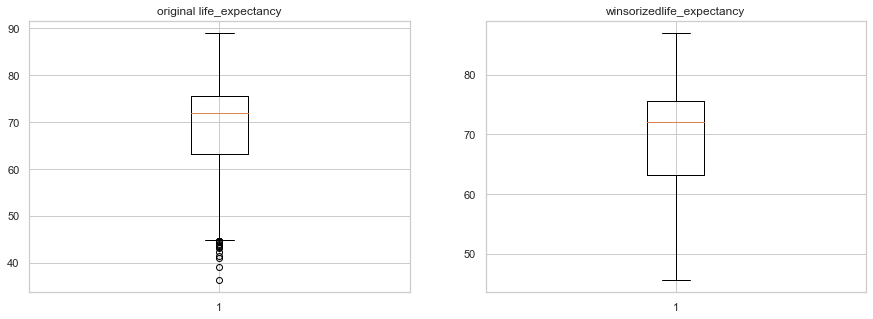

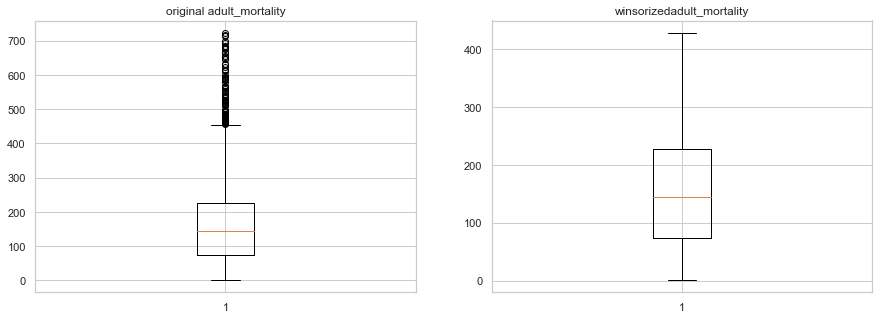

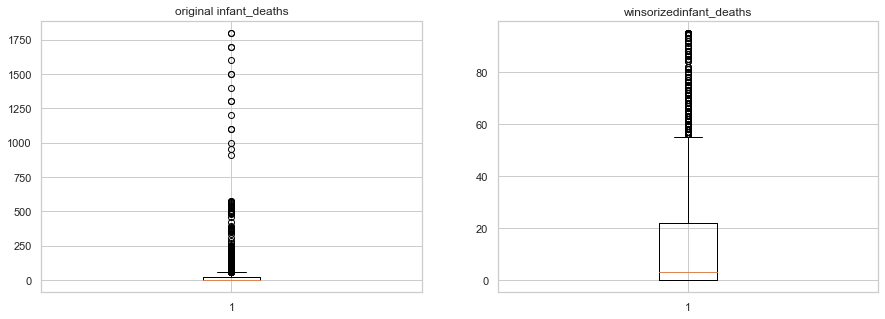

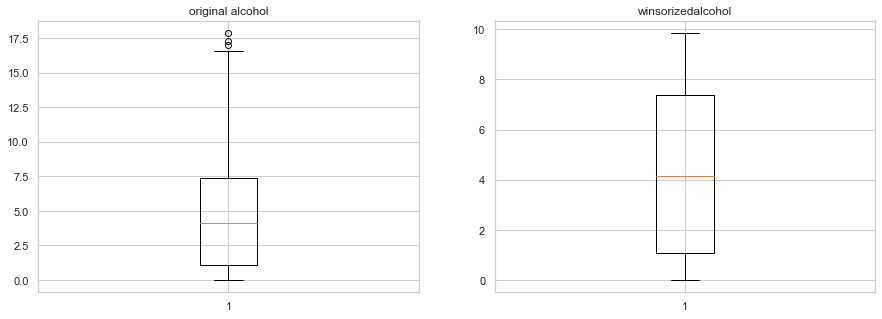

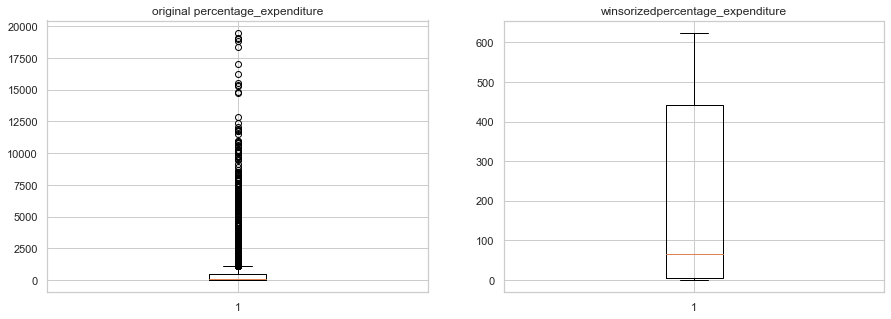

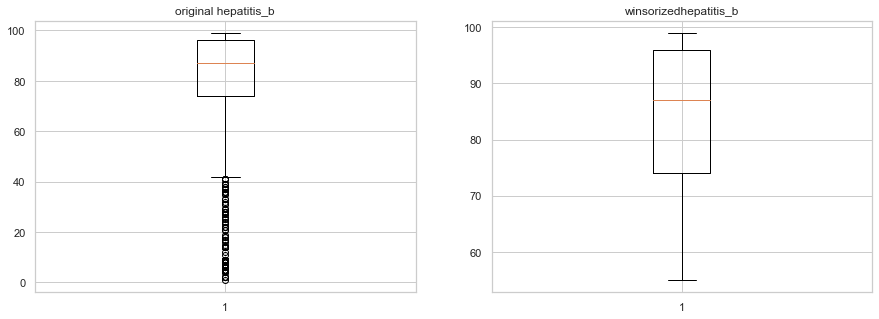

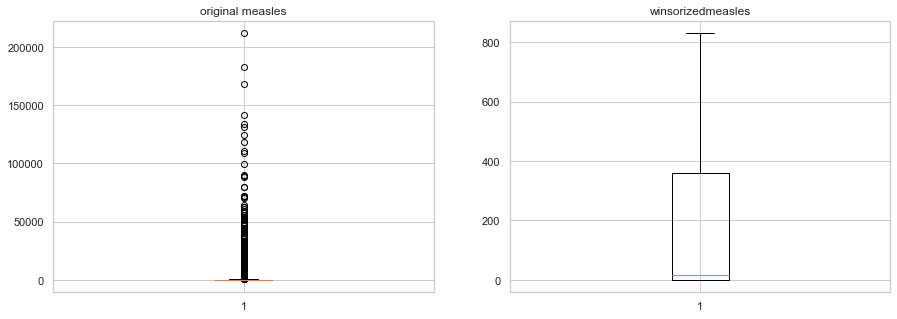

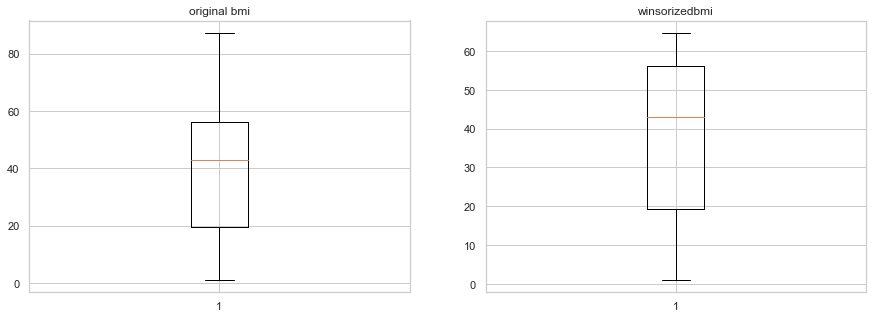

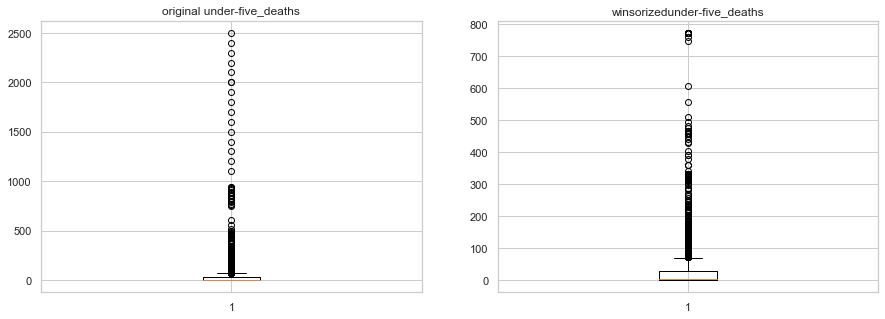

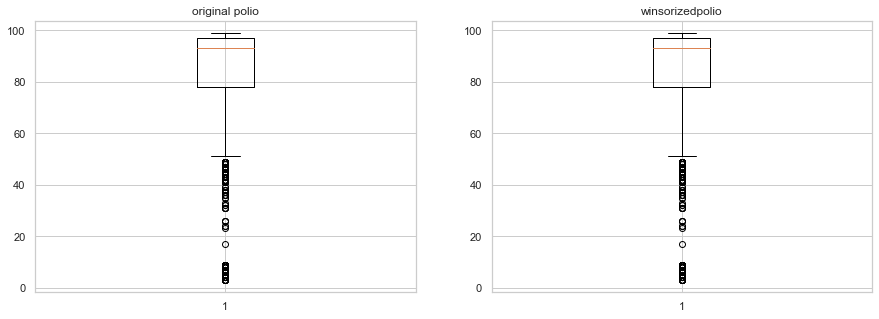

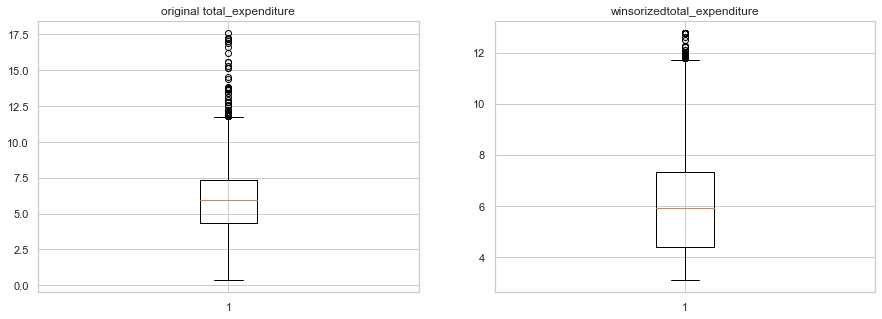

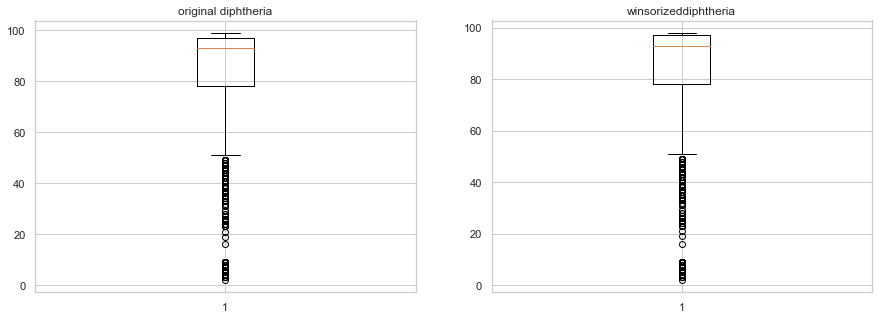

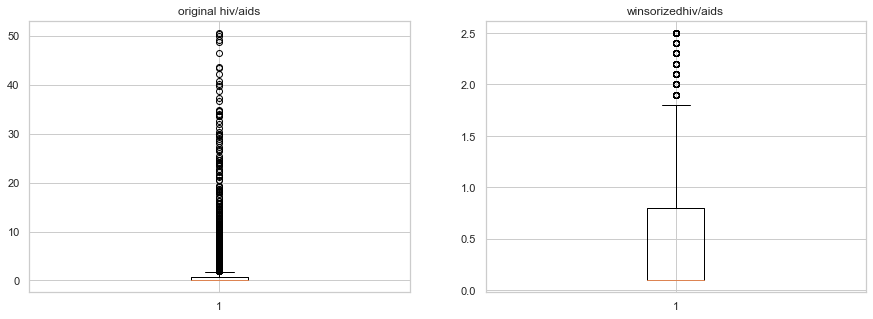

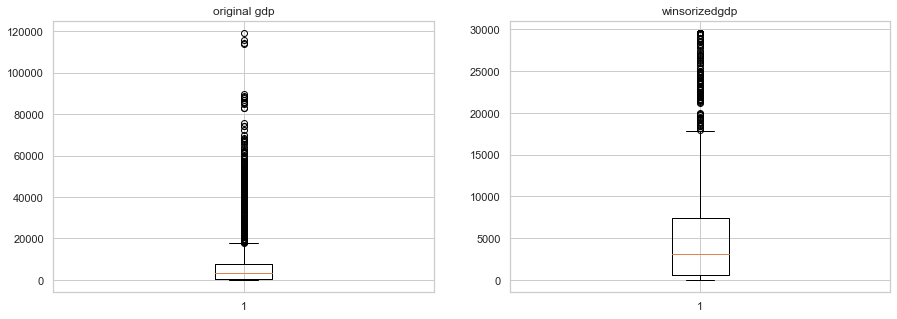

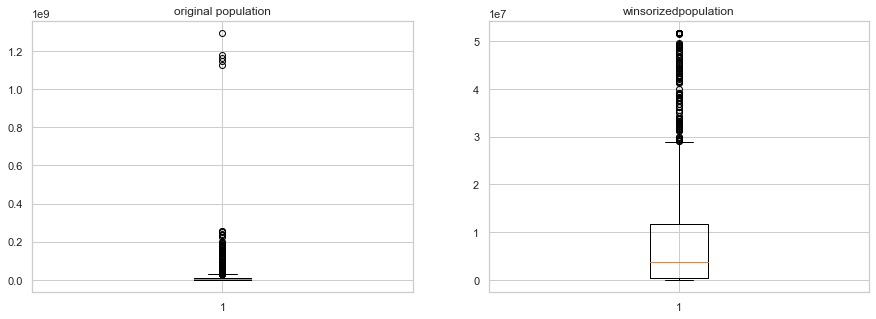

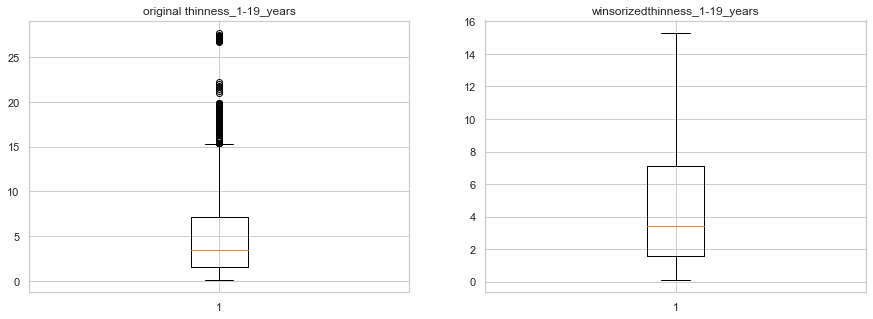

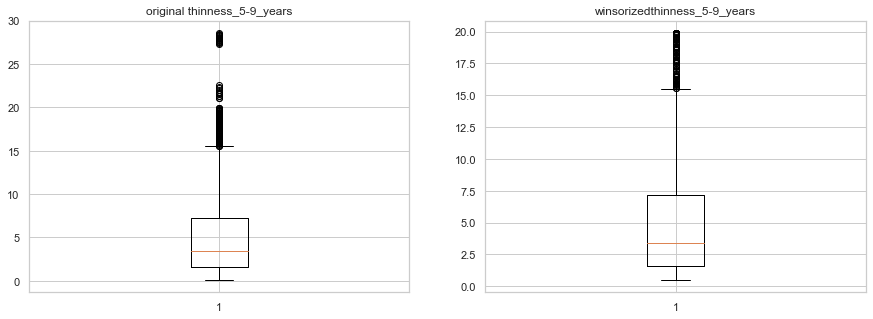

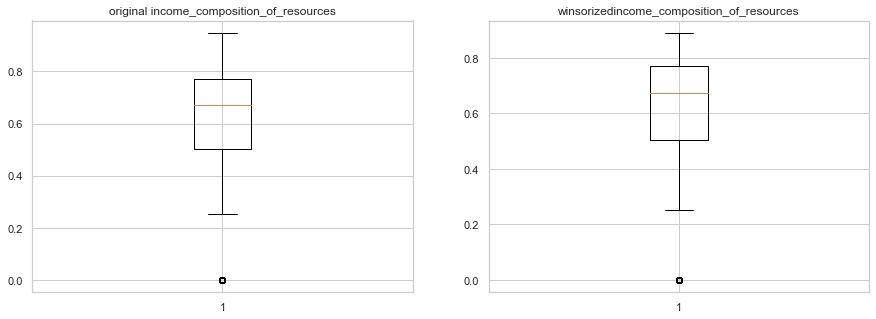

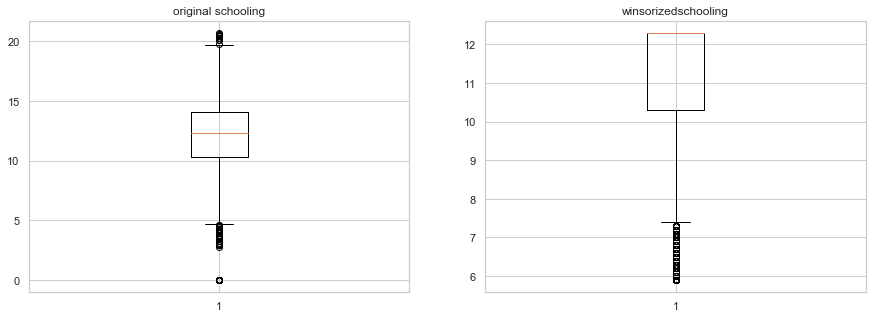

In [23]:
wins_dict = {}
winsor(cols[0],l_l = 0.01)
winsor(cols[1],u_l = 0.04)
winsor(cols[2],u_l = 0.05,l_l = 0.1)
winsor(cols[3],l_l = 0.01, u_l = 0.135)
winsor(cols[4],l_l = 0.05,u_l = 0.2)
winsor(cols[5],l_l = 0.1,u_l = 0.01)
winsor(cols[6],u_l = 0.19)
winsor(cols[7],u_l = 0.05)
winsor(cols[8],l_l = 0.1)
winsor(cols[9],u_l = 0.02)
winsor(cols[10],l_l = 0.105)
winsor(cols[11],u_l = 0.185)
winsor(cols[12],u_l = 0.15)
winsor(cols[13],u_l = 0.07)
winsor(cols[14],u_l = 0.035)
winsor(cols[15],u_l = 0.035)
winsor(cols[16],l_l = 0.05)
winsor(cols[17],u_l = 0.05)
winsor(cols[18],l_l=0.05, u_l = 0.5)


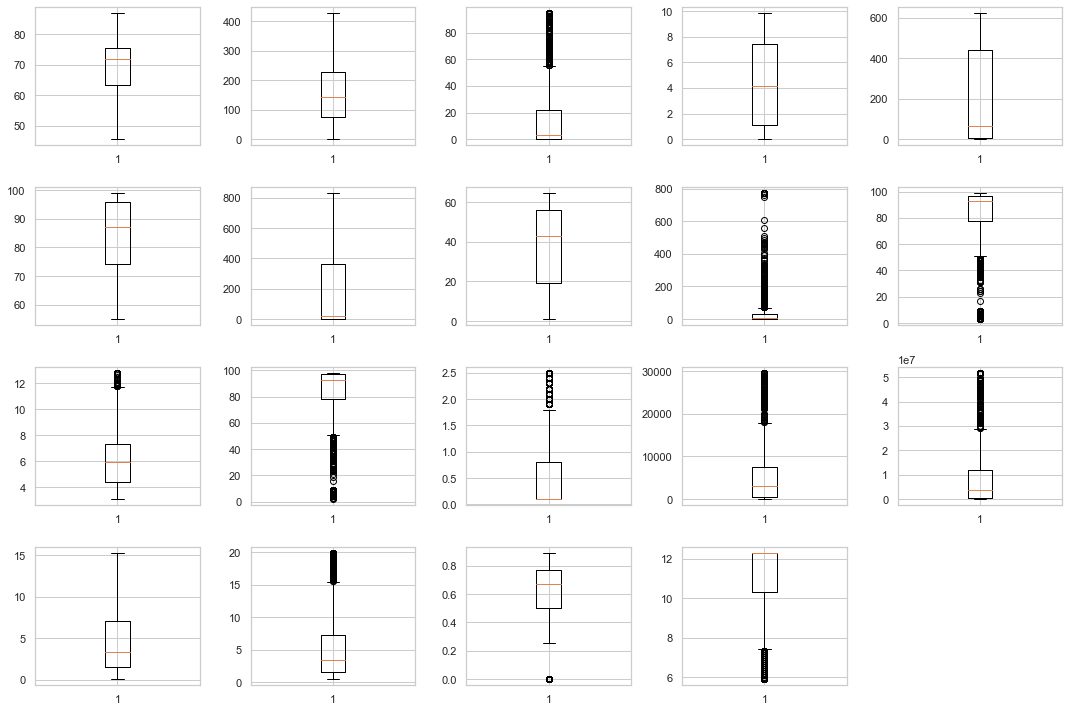

In [24]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cols, 1):
    plt.subplot(4, 5, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

### Create a new Datafram of winsorized data

In [25]:
new_df = df.iloc[:, 0:3]
for col in cols:
    new_df[col] = wins_dict[col]

In [26]:
new_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,831,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.3,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.3,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.3,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,831,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.3,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,831,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.3,18.2,0.454,9.5


### Univariate analysis

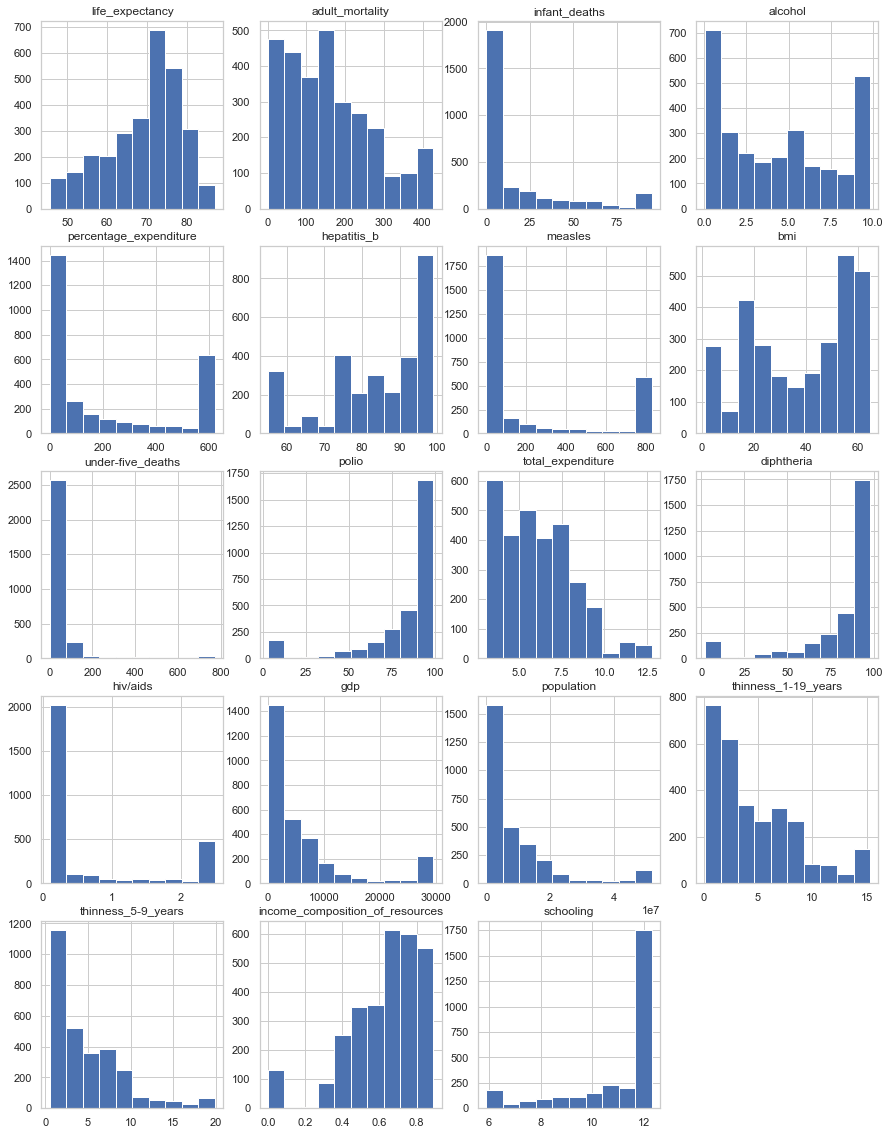

In [27]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 4, i)
    plt.hist(new_df[col])
    plt.title(col)

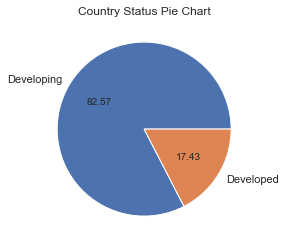

In [28]:

new_df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()


### Multivariate analysis

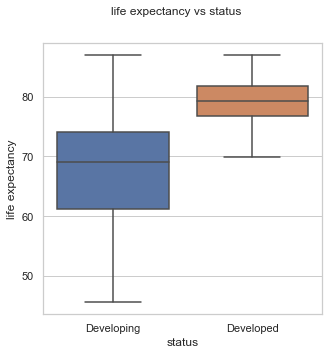

In [36]:
# categorical and continous
sns.boxplot( x=new_df["status"], y=new_df["life_expectancy"], data = new_df)
rcParams['figure.figsize'] = 5, 5
plt.suptitle('life expectancy vs status ')
plt.xlabel('status')
plt.ylabel('life expectancy')
plt.show()



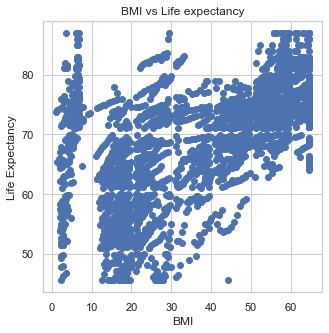

In [38]:
x = new_df['bmi']
y = new_df['life_expectancy']
plt.scatter(x,y)
plt.title('BMI vs Life expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

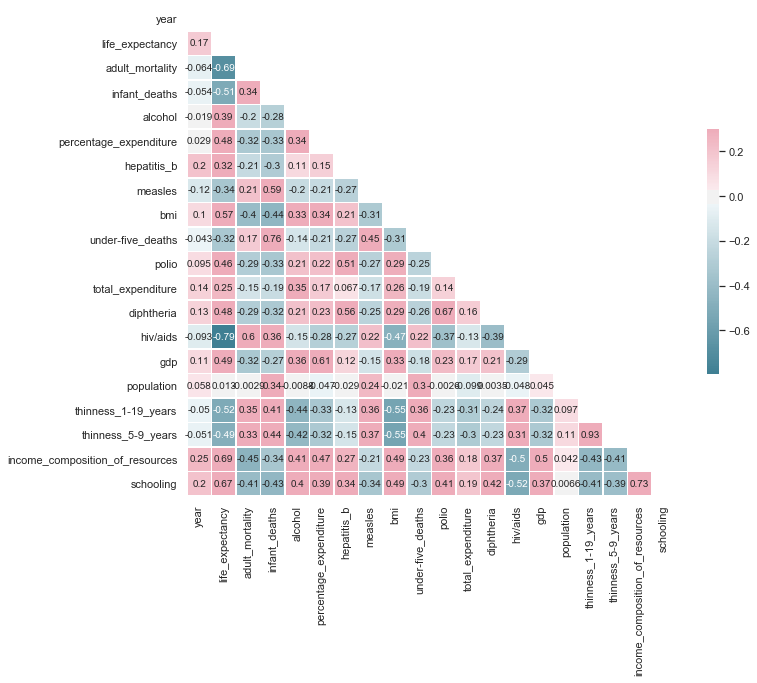

In [29]:
corr = new_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 5, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,annot = True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Factors that increase or decrease life expectancy 
Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:
1. Adult Mortality (negative)
2. HIV/AIDS (negative)
3. Income Composition of Resources (positive)
4. Schooling (positive)
5. Life expectancy is not correlated to population (nearly no correlation at all)
6. Infant deaths (negative)
7. bmi (positive)????

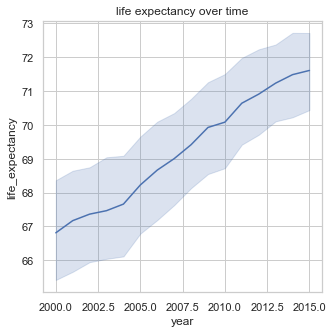

In [43]:
# life expectancy has increased over time
sns.lineplot( 'year', 'life_expectancy', data=new_df)
plt.title('life expectancy over time')
plt.show()


life expectancy has increased over time and there is some correlation between the two 

In [45]:
new_df.groupby('status').life_expectancy.agg(['mean'])

,mean
status,
Developed,79.149023
Developing,67.146192


In [51]:
from scipy import stats
#
developed = new_df[new_df.status == 'Developed'].life_expectancy
developing = new_df[new_df.status == 'Developing'].life_expectancy
stats.ttest_ind(developed, developing, equal_var=False)

Ttest_indResult(statistic=48.43918257728181, pvalue=0.0)

### status 
The status of country is positively correlated with life expectancy of a country. T- test result support that status of country is an important factor that increases life expectancy. 

In [53]:
var = new_df.groupby('status').agg(['mean'])

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.149023,79.685547,1.494141,8.625456,409.233288,86.930131,127.019531,51.647656,1.810547,93.736328,7.598223,93.304688,0.10000,14410.094270,7.427987e+06,1.320703,1.315039,0.826001,12.252932
Developing,2007.522671,67.146192,178.171332,19.610058,3.515131,166.194970,82.983525,240.460429,35.270226,43.131492,80.173183,5.775263,79.839480,0.75878,4403.109306,8.947850e+06,5.417248,5.572729,0.584632,10.748380
